#Importando a base de dados

In [1]:
import pandas as pd
data = pd.read_json("Telco-Customer-Churn-DT.json")
data.head()

,customerID,Churn,Genero,MelhorIdade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,MultiplosTelefones,ServicoInternet,...,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
0,0002-ORFBO,0,1,0,1,1,9,1,0.0,DSL,...,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667,2.156712
1,0003-MKNFE,0,0,0,0,0,9,1,1.0,DSL,...,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1.969315
2,0004-TLHLJ,1,0,0,0,0,4,1,0.0,Fiber optic,...,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2.429589
3,0011-IGKFF,1,0,1,1,0,13,1,0.0,Fiber optic,...,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,3.221918
4,0013-EXCHZ,1,1,1,1,0,3,1,0.0,Fiber optic,...,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,2.758356


#Separando o Treino e o Teste com *train_test_split*

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = data[['Genero', 'MelhorIdade', 'Conjuge', 'Dependentes', 'MesesContrato', 'ServicoTelefonico', 'TipoDaFatura', 'Cobranca.Mes', 'Cobranca.Total', 'GastoDiario30Dias', 'GastoDiario365Dias']]
y = data['Churn']

SEED = 20
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify = y)
print('Treinaremos com {} registros e testaremos com {} registros'.format(len(treino_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 5282 registros e testaremos com 1761 registros
A acurácia foi 49.12%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


##Utilizando o **STRATIFY = Y** é possível manter a proporção entre o TREINO e o TESTE

In [3]:
treino_y.value_counts()

0    3880
1    1402
Name: Churn, dtype: int64

In [4]:
teste_y.value_counts()

0    1294
1     467
Name: Churn, dtype: int64

*A proporção entre o TREINO e o TESTE é de 2,77*

#Criação de um baseline para saber o quão boa está acurácia (DummyClassifier)

##Dummy Stratified

In [5]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
#previsoes = dummy_stratified.predict(teste_x)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

#acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia dummy stratified foi %.2f%%" % acuracia)

A acurácia dummy stratified foi 73.48%


##Dummy Most Frequent

In [6]:
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
#previsoes = dummy_mostfrequent.predict(teste_x)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

#acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia dummy most frequent foi %.2f%%" % acuracia)

A acurácia dummy most frequent foi 73.48%


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y, test_size = 0.25,
                                                                        stratify = y)
print('Treinaremos com {} registros e testaremos com {} registros'.format(len(treino_x),len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %2.f%%" % acuracia)

Treinaremos com 5282 registros e testaremos com 1761 registros
A acurácia foi 73%


#Árvore de decisão e visualizando as decisões de um estimador

In [22]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y, test_size = 0.25,
                                                                        stratify = y)
print('Treinaremos com {} registros e testaremos com {} registros'.format(len(treino_x),len(teste_x)))

# Não precisamos do escalador (Scaler) para a árvore de decisão funcionar bem
# Por isso, estou comentando o código abaixo
#scaler = StandardScaler()
#scaler.fit(raw_treino_x)
#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %2.f%%" % acuracia)

Treinaremos com 5282 registros e testaremos com 1761 registros
A acurácia foi 73%


##Exportando a visualização gráfica da árvore de decisão para saber como ela está tomando decisões

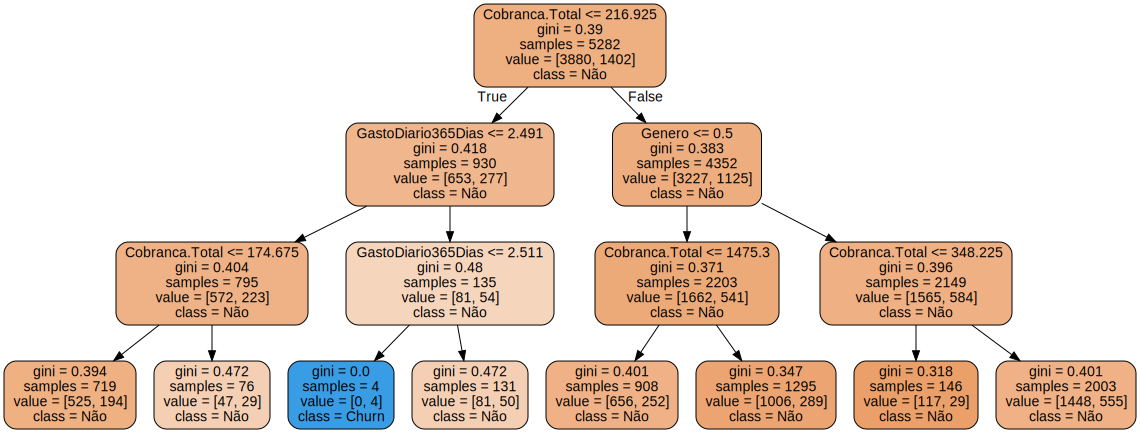

In [23]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["Não", "Churn"])
grafico = graphviz.Source(dot_data)
grafico